In [2]:
def tikz_convert(ax,
         clean = False, mktex = False, path = "", filename = "", caption = None):
    
    num = len(ax.get_axes()) 
    if num != 1:
        num = 2
    
    if filename == "":
        import uuid
        filename = str(uuid.uuid4()) + ".tex"
        
    if path == "":
        path = "../Obsidian"
    
    if mktex:
    
        import tikzplotlib as tikz

        def tikzplotlib_fix_ncols(obj):
            """
            workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
            """
            if hasattr(obj, "_ncols"):
                obj._ncol = obj._ncols
            for child in obj.get_children():
                tikzplotlib_fix_ncols(child)

        tikzplotlib_fix_ncols(ax)
        if clean:
            ax = tikz.clean_figure(ax)
        
        tikz.save(f"{path}/{filename}", 
                axis_width = f"\\textwidth/{num} - 2cm",
                axis_height = "9cm")
    if caption:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\caption({caption})
\\end{{figure}}
```""")
    else:
        print(f"""
```text
\\begin{{figure}}[H]
\\centering
[[{filename}]]
\\end{{figure}}
```""")
    
    return None

0    1.690000
1    1.443333
2    1.243333
3    1.076667
4    0.946667
Name: time, dtype: float64
       time  temp_K        V_g       K_gc      K_gp
0  1.690000  323.15  86.020379  86.020379  4.268450
1  1.443333  328.15  71.737820  71.737820  3.505490
2  1.243333  333.15  59.978376  59.978376  2.886874
3  1.076667  338.15  50.007377  50.007377  2.371361
4  0.946667  343.15  42.141911  42.141911  1.969261
[3965.11635853   -7.81230104]


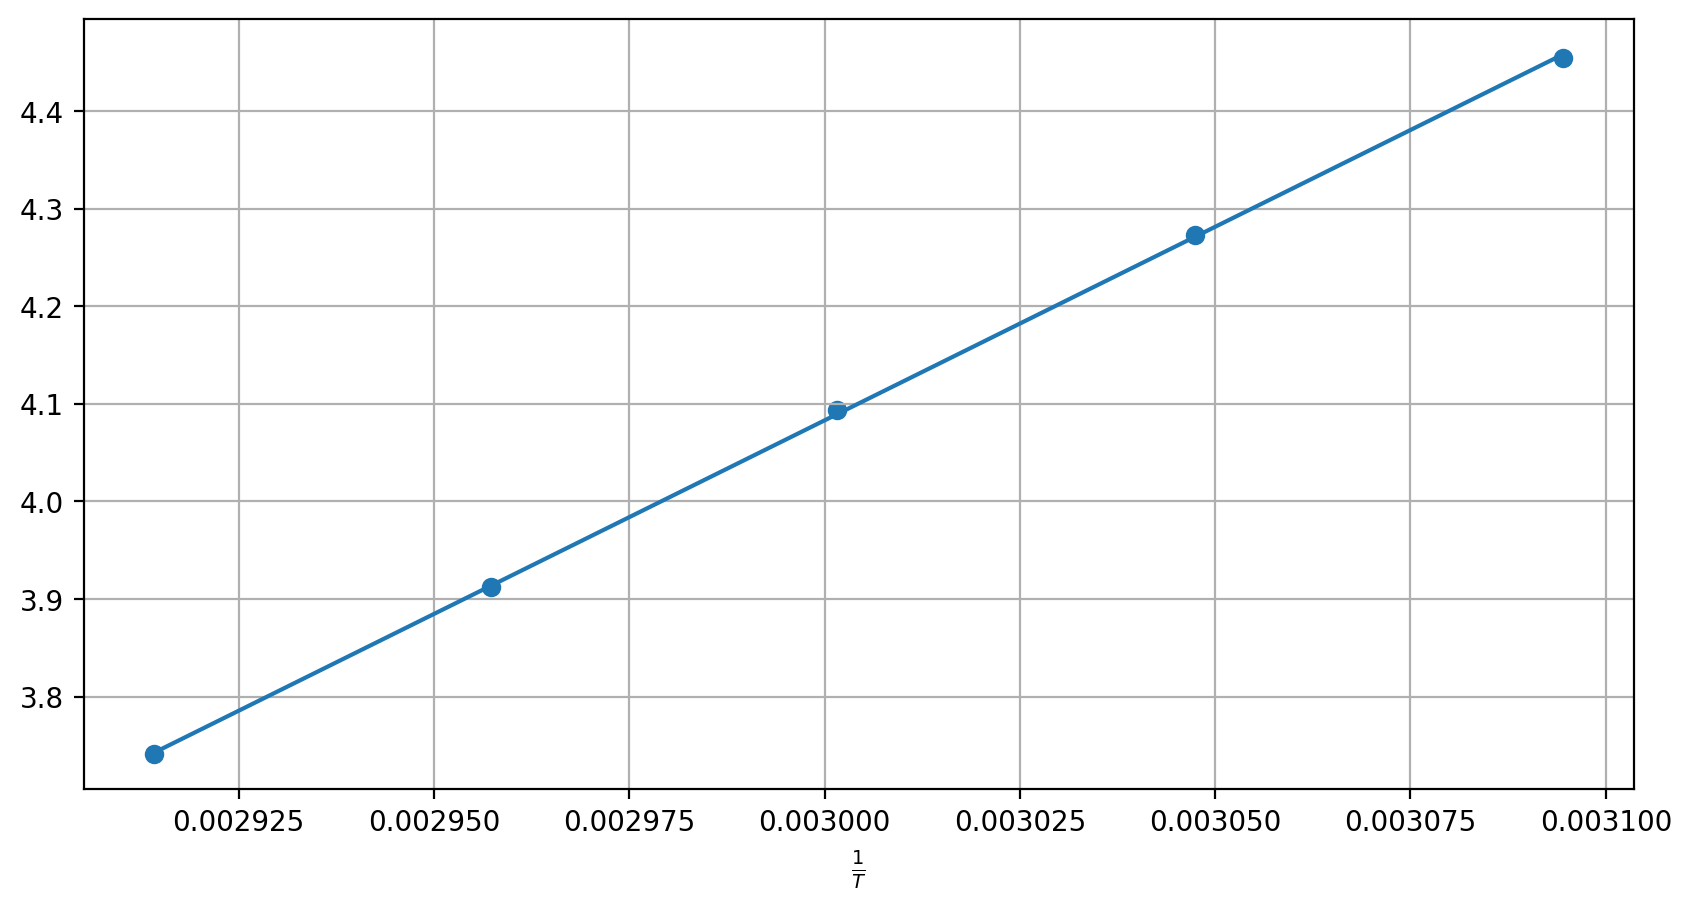

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

t_room = 19 + 273.15
t0 = 0.31
m = 2.366 * 0.15
F = 20
a0 = 1
p0 = 1
C0 = 1 
R = 6.2363e-2

df_exp = {"time": [[1.69, 1.69, 1.69],
                   [1.45, 1.44, 1.44],
                   [1.25, 1.24, 1.24],
                   [1.08, 1.08, 1.07],
                   [0.94, 0.95, 0.95]],
      "temp_C": [50, 55, 60, 65, 70]
     }

df_exp = pd.DataFrame(df_exp)

df = {"time": np.array([np.sum(x)/len(x) for x in df_exp["time"]]),
      "temp_K": 273.15 + df_exp["temp_C"]}

df = pd.DataFrame(df)
df["V_g"] = (df["time"] - t0)/m * F * ((np.array(df_exp["temp_C"]) + 273.15)/t_room)
df["K_gc"] = df["V_g"] * 1/a0 / (1/p0)
df["K_gp"] = df["K_gc"] * p0 / (C0 * R * df["temp_K"])
   
print(df["time"])
df = pd.DataFrame(df)
print(df)

plt.figure(figsize=(10,5), dpi =200)
plt.scatter(1/df["temp_K"], np.log(df["K_gc"]))

popt, pcov = curve_fit(lambda x,k,b: k*x + b, 1/df["temp_K"], np.log(df["K_gc"]))
print(popt)
x = np.linspace(1/df["temp_K"].min(),1/df["temp_K"].max(),100)
plt.plot(x, popt[0]*x + popt[1])

plt.grid()
plt.xlabel("$\\frac{1}{T}$")
plt.show()

       time       tr2  temp_K        V_g       K_gc      K_gp
0  1.690000  1.380000  323.15  86.020379  86.020379  4.268450
1  1.443333  1.133333  328.15  71.737820  71.737820  3.505490
2  1.243333  0.933333  333.15  59.978376  59.978376  2.886874
3  1.076667  0.766667  338.15  50.007377  50.007377  2.371361
4  0.946667  0.636667  343.15  42.141911  42.141911  1.969261
H = -35733.93527591423+--223.78941373875995
S = -98.48488036586231+-0.6721920482989163
|    |   time |   tr2 |   temp_K |    V_g |   K_gc |   K_gp |
|----|--------|-------|----------|--------|--------|--------|
|  0 |  1.69  | 1.38  |   323.15 | 86.02  | 86.02  |  4.268 |
|  1 |  1.443 | 1.133 |   328.15 | 71.738 | 71.738 |  3.505 |
|  2 |  1.243 | 0.933 |   333.15 | 59.978 | 59.978 |  2.887 |
|  3 |  1.077 | 0.767 |   338.15 | 50.007 | 50.007 |  2.371 |
|  4 |  0.947 | 0.637 |   343.15 | 42.142 | 42.142 |  1.969 |


/tmp/ipykernel_5587/2871281269.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(auto_format)


'\ntikz_convert(ax, \n             clean = False, \n             mktex = True, \n             path = "", \n             filename = "sorption1.tex")\n'

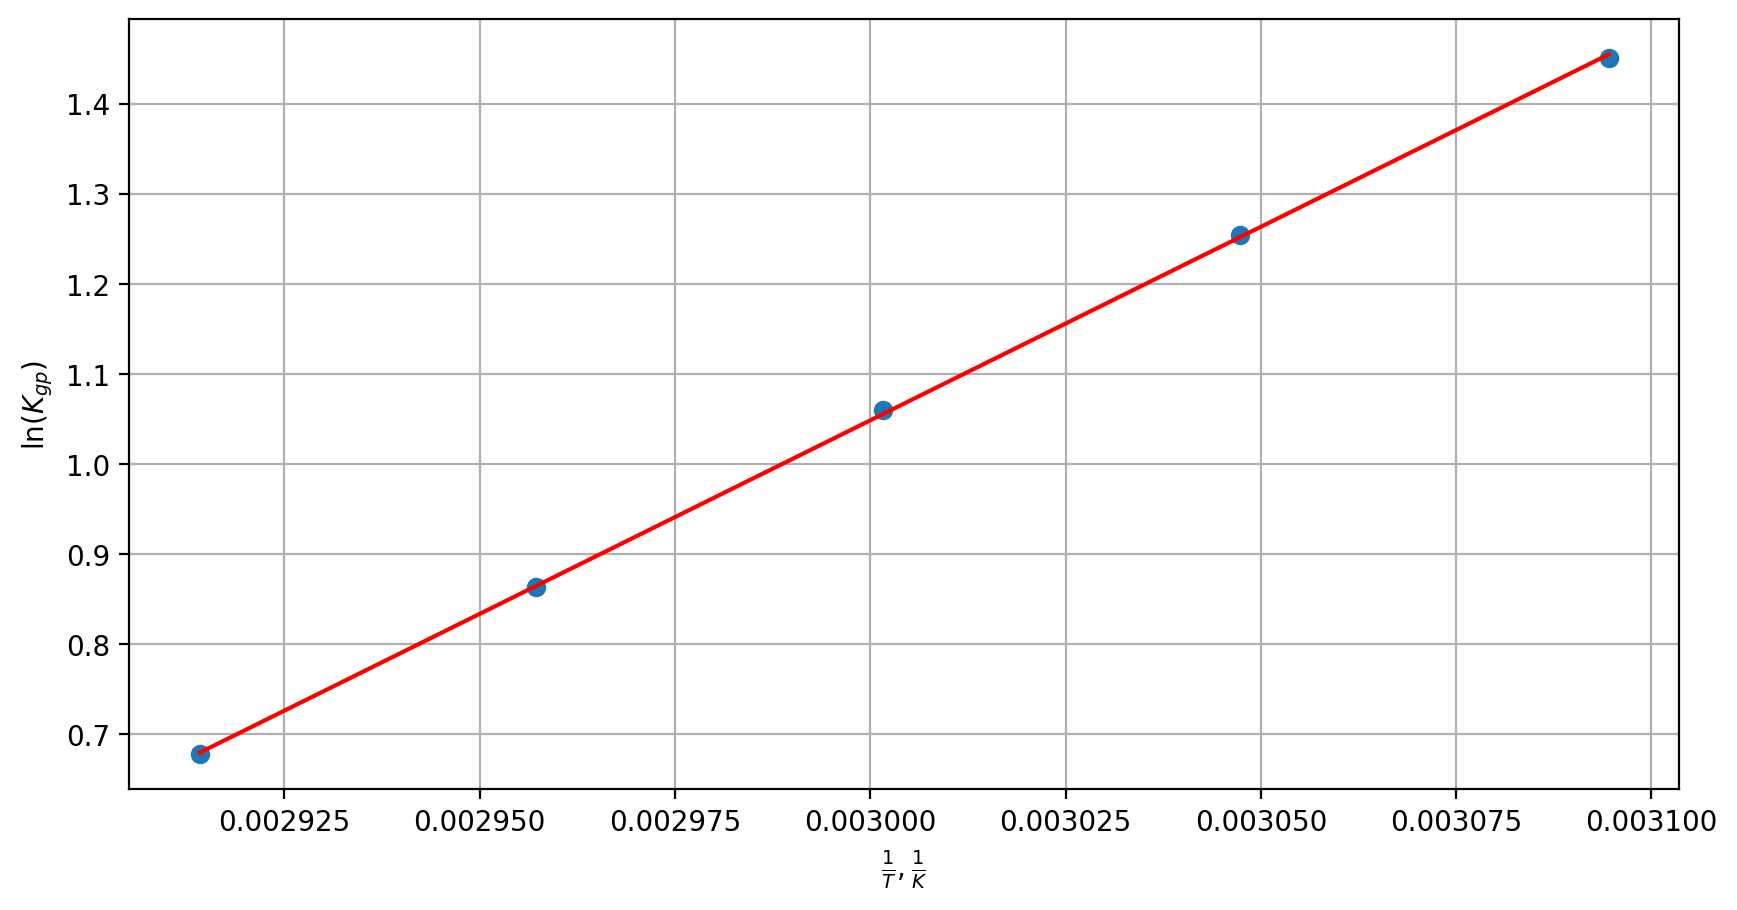

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

t_room = 19 + 273.15
t0 = 0.31
m = 2.366 * 0.15
F = 20
a0 = 1
p0 = 1
C0 = 1 
R = 6.2363e-2

df_exp = {"time": [[1.69, 1.69, 1.69],
                   [1.45, 1.44, 1.44],
                   [1.25, 1.24, 1.24],
                   [1.08, 1.08, 1.07],
                   [0.94, 0.95, 0.95]],
          "temp_C": [50, 55, 60, 65, 70]
         }

df_exp = pd.DataFrame(df_exp)

# Создаём DataFrame последовательно
df = pd.DataFrame()
df["time"] = np.array([np.mean(x) for x in df_exp["time"]])
df["tr2"] = df.time - t0
df["temp_K"] = 273.15 + df_exp["temp_C"]
df["V_g"] = (df["time"] - t0) / m * F * (df["temp_K"] / t_room)
df["K_gc"] = df["V_g"] / a0 / (1 / p0)
df["K_gp"] = df["K_gc"] * p0 / (C0 * R * df["temp_K"])


print(df)

# Построение графика
ax = plt.figure(figsize=(10,5), dpi=200)

# Фитирование линейной зависимости
popt, pcov = curve_fit(lambda x, k, b: k * x + b, 1 / df["temp_K"], np.log(df["K_gp"]))
print(f"f(x) = {popt[0]}x +- popt[]")
print(f"H = {popt[0]*(-8.314)}+-{np.sqrt(pcov[0,0])*(-8.314)}")
print(f"S = {popt[1]*(8.314)}+-{np.sqrt(pcov[1,1])*(8.314)}")

x_vals = np.linspace(1/df["temp_K"].max(), 1/df["temp_K"].min(), 100)
plt.plot(x_vals, popt[0] * x_vals + popt[1], color='red')

plt.scatter(1 / df["temp_K"], np.log(df["K_gp"]))


plt.grid()
plt.xlabel("$\\frac{1}{T}, \\frac{1}{K}$")
plt.ylabel("$\\ln(K_{gp})$")


def auto_format(number):
    if isinstance(number, (int, float)):
        if abs(number) >= 1000 or (abs(number) < 0.001 and number != 0):
            return f"{number:.3e}"  # Экспоненциальный формат
        else:
            return f"{number:.3f}"  # Обычный формат
    return str(number)  # Если это не число, оставляем как есть

def format_dataframe(df):
    return df.applymap(auto_format)

from tabulate import tabulate
print(tabulate(format_dataframe(df),  headers = [ "time", 'tr2',  'temp_K', 'V_g', 'K_gc', 'K_gp'],tablefmt = 'github'))
"""
tikz_convert(ax, 
             clean = False, 
             mktex = True, 
             path = "", 
             filename = "sorption1.tex")
"""

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from tabulate import tabulate

# Константы
tm = 0.29
ro = 0.8786
M = 78.1118
t_room = 21 + 273.15
m = 2.358
Fc = 25
R = 62.363
Tc = 273.15 + 85

# Данные
df = {"V": [1, 2, 3, 4, 5, 6, 7, 8],
      "h": [56.759, 122.040, 176.040, 222.476, 275.673, 318.398, 361.495, 381.788],
      "tR": [2.45, 2.26, 2.16,2.09, 2.04, 1.98, 1.93, 1.91],
      "S": [29.7770, 68.2134, 102.7187, 138.4549, 174.5128, 209.5912, 247.8346, 266.9029],
      "S1": [21.3910, 48.8708, 73.2268,97.9935, 123.1802, 147.5510, 174.1967, 187.7260]}

df = pd.DataFrame(df)

# Вычисления
df["n"] = ro * df.V / M
df["tR2"] = df.tR - tm
df["S2"] = df.tR2 * df.h
df["S_ads"] = df.S1 + df.S2
df["a"] = df.n * df.S_ads / (m * df.S)
df["p"] = df.n * df.h / (df.S * Fc) * R * Tc


# Вывод данных
from IPython.display import display
display(df)


print(tabulate(format_dataframe(df),  headers = ["V",	"h",	"$t_R$",	"S",	"$S_1$",	"n",	"$t_{R_2}$",	"$S_2$","$S_{ads}$","a",	"p"],tablefmt = 'github'))

,V,h,tR,S,S1,n,tR2,S2,S_ads,a,p
0,1,56.759,2.45,29.7770,21.3910,0.011248,2.16,122.59944,143.99044,0.023067,19.154918
1,2,122.040,2.26,68.2134,48.8708,0.022496,1.97,240.41880,289.28960,0.040460,35.957459
2,3,176.040,2.16,102.7187,73.2268,0.033744,1.87,329.19480,402.42160,0.056064,51.666566
3,4,222.476,2.09,138.4549,97.9935,0.044992,1.80,400.45680,498.45030,0.068692,64.589411
4,5,275.673,2.04,174.5128,123.1802,0.056240,1.75,482.42775,605.60795,0.082768,79.371292
5,6,318.398,1.98,209.5912,147.5510,0.067488,1.69,538.09262,685.64362,0.093628,91.595689
6,7,361.495,1.93,247.8346,174.1967,0.078736,1.64,592.85180,767.04850,0.103345,102.604143
7,8,381.788,1.91,266.9029,187.7260,0.089984,1.62,618.49656,806.22256,0.115272,114.996724


|    |   V |       h |   $t_R$ |       S |   $S_1$ |     n |   $t_{R_2}$ |   $S_2$ |   $S_{ads}$ |     a |       p |
|----|-----|---------|---------|---------|---------|-------|-------------|---------|-------------|-------|---------|
|  0 |   1 |  56.759 |    2.45 |  29.777 |  21.391 | 0.011 |        2.16 | 122.599 |     143.99  | 0.023 |  19.155 |
|  1 |   2 | 122.04  |    2.26 |  68.213 |  48.871 | 0.022 |        1.97 | 240.419 |     289.29  | 0.04  |  35.957 |
|  2 |   3 | 176.04  |    2.16 | 102.719 |  73.227 | 0.034 |        1.87 | 329.195 |     402.422 | 0.056 |  51.667 |
|  3 |   4 | 222.476 |    2.09 | 138.455 |  97.993 | 0.045 |        1.8  | 400.457 |     498.45  | 0.069 |  64.589 |
|  4 |   5 | 275.673 |    2.04 | 174.513 | 123.18  | 0.056 |        1.75 | 482.428 |     605.608 | 0.083 |  79.371 |
|  5 |   6 | 318.398 |    1.98 | 209.591 | 147.551 | 0.067 |        1.69 | 538.093 |     685.644 | 0.094 |  91.596 |
|  6 |   7 | 361.495 |    1.93 | 247.835 | 174.197 | 0.079 |    

/tmp/ipykernel_5587/2871281269.py:65: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(auto_format)


Оптимальные параметры модели: [34.69836548 -1.39195714]
Ковариационная матрица:
 [[ 0.61010235 -2.74545985]
 [-2.74545985 15.55760034]]
Коэффициент детерминации R^2: 0.996968780861437


AttributeError: module 'webcolors' has no attribute 'CSS3_HEX_TO_NAMES'

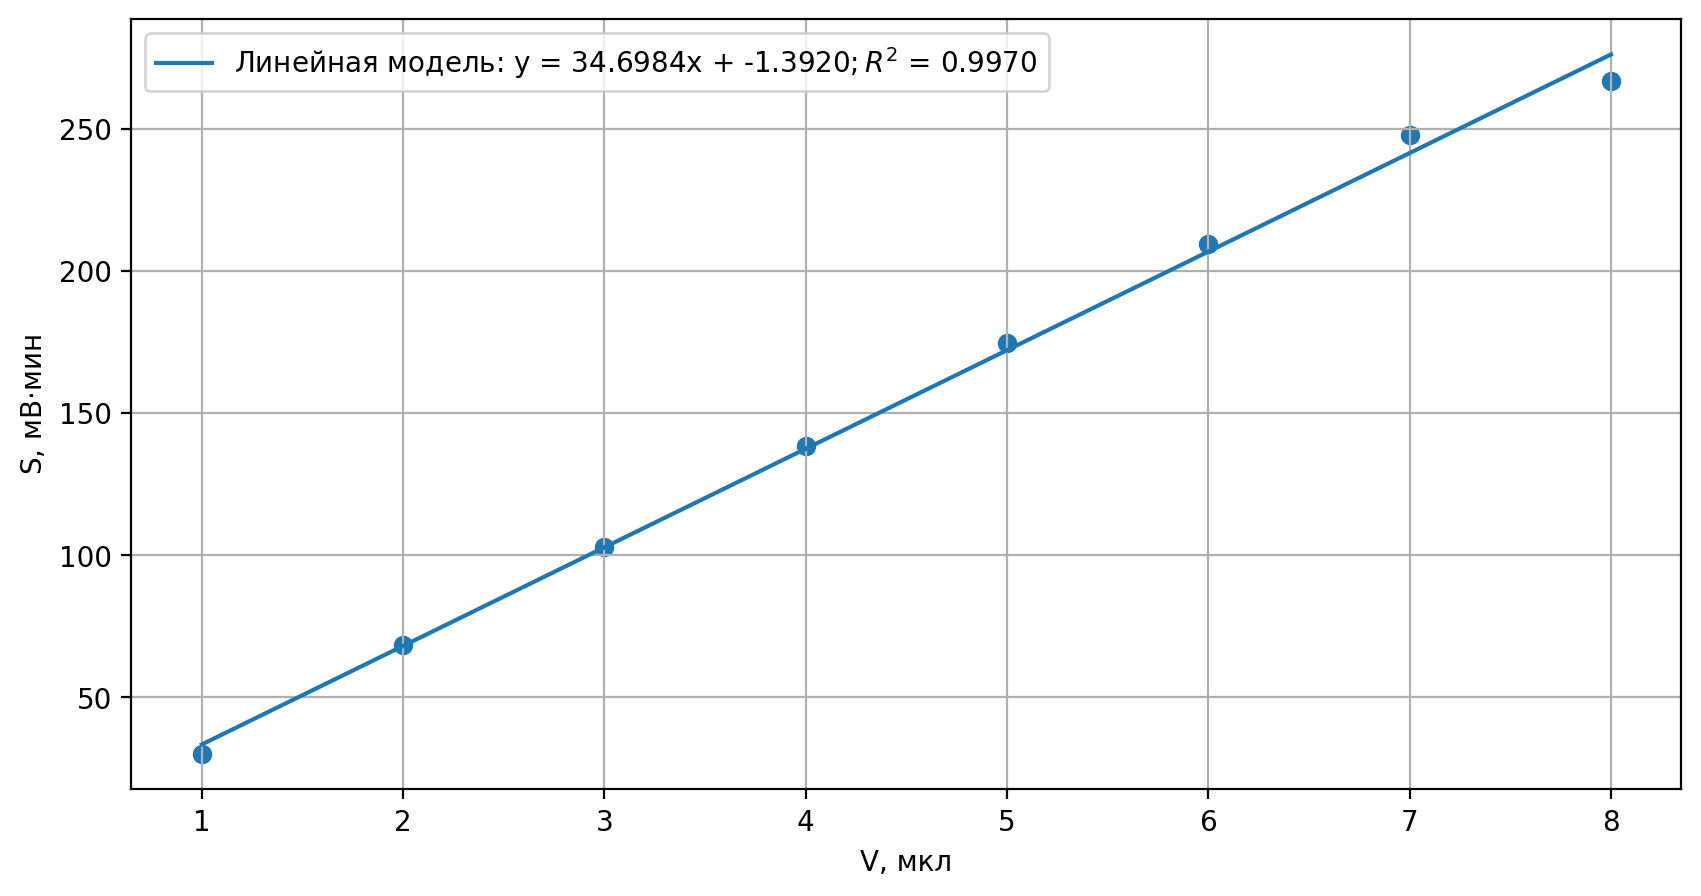

In [13]:
# Подгонка линейной модели
popt, pcov = curve_fit(lambda x, k, b: k * x + b, df.V, df.S)
print("Оптимальные параметры модели:", popt)
print("Ковариационная матрица:\n", pcov)

# Предсказанные значения
y_pred = popt[0] * (df.V) + popt[1]

# Вычисление R^2
ss_res = np.sum((df.S - y_pred) ** 2)  # Сумма квадратов остатков
ss_tot = np.sum((df.S - np.mean(df.S)) ** 2)  # Общая сумма квадратов
r_squared = 1 - (ss_res / ss_tot)  # Коэффициент детерминации

print(f"Коэффициент детерминации R^2: {r_squared}")

# График
ax = plt.figure(figsize=(10, 5), dpi=200)
plt.scatter(df.V, df.S)


# Построение линии регрессии
x = np.linspace((df.V).min(), (df.V).max(), 2)
plt.plot(x, popt[0] * x + popt[1], label=f"Линейная модель: y = {popt[0]:.4f}x + {popt[1]:.4f}$; R^2$ = {r_squared:.4f}")
plt.xlabel("V, мкл")
plt.ylabel("S, мВ$\\cdot$мин")
plt.legend()
plt.grid()

tikz_convert(ax, 
             clean = False, 
             mktex = True, 
             path = "", 
             filename = "sorption2.tex")




Оптимальные параметры модели: [796.17886666   2.09078681]
Ковариационная матрица:
 [[ 6.89061010e+01 -1.35066722e+00]
 [-1.35066722e+00  3.92914704e-02]]
Коэффициент детерминации R^2: 0.9993482147629171
Адсорбция монослоя:  0.4782888418590866 +- 0.12046785065231229 мМоль/г
S удельная:  141.15595103134666 +- 2.652697469192935 м^2/г


'\ntikz_convert(ax, \n             clean = False, \n             mktex = True, \n             path = "", \n             filename = "sorption3.tex")\n'

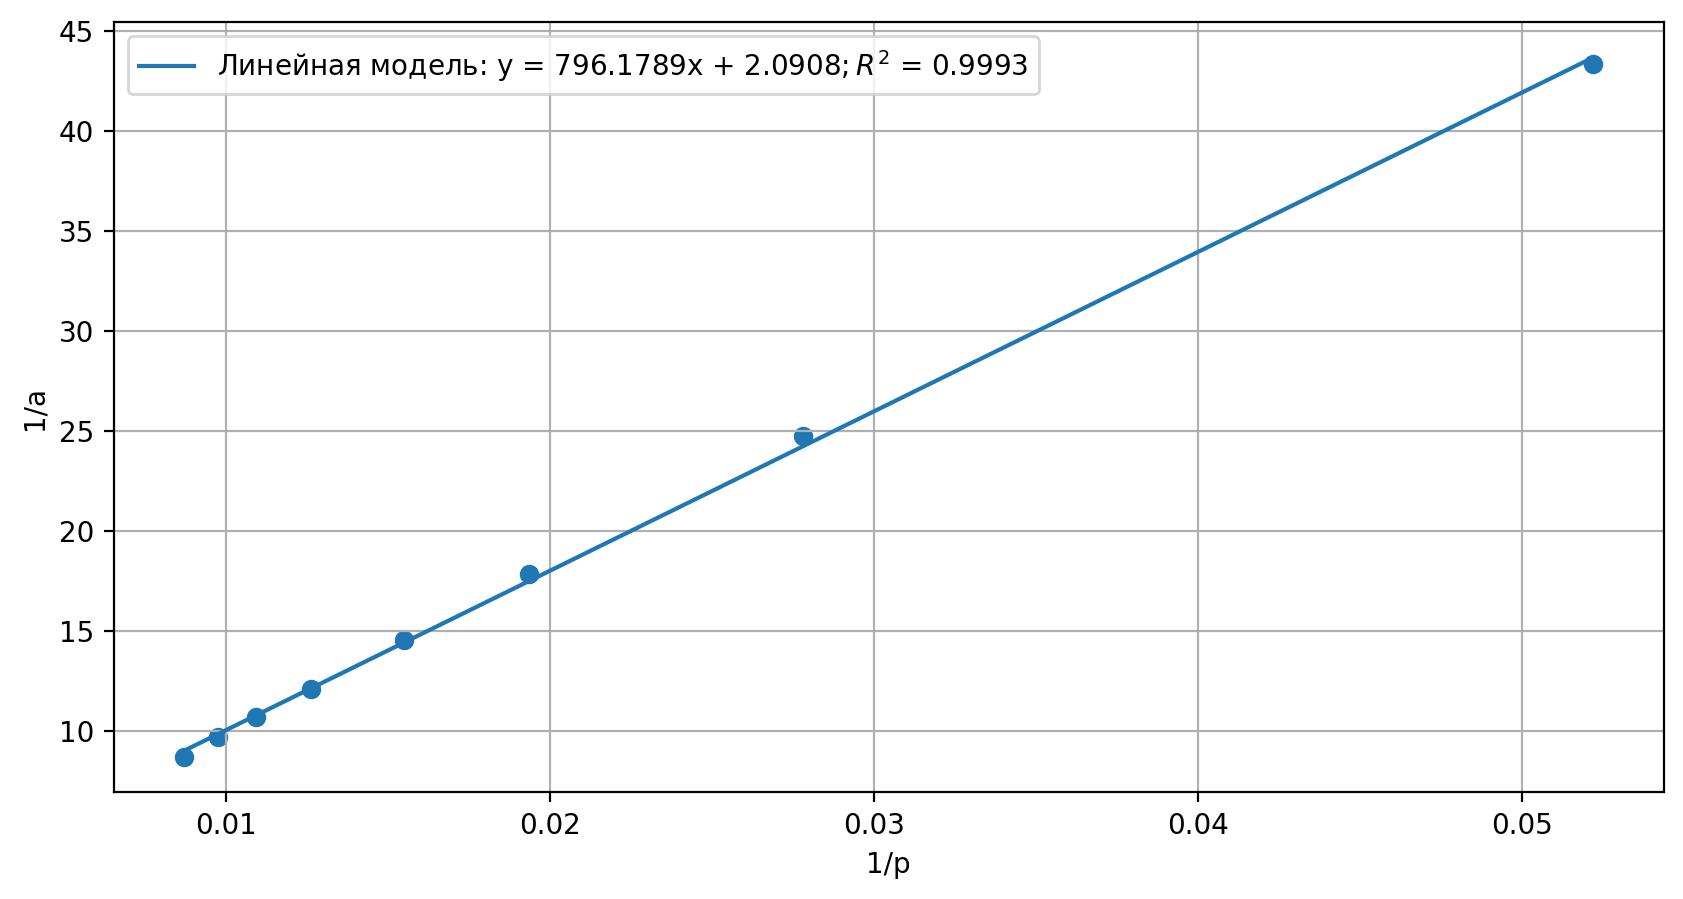

In [17]:
# Подгонка линейной модели
popt, pcov = curve_fit(lambda x, k, b: k * x + b, 1 / df.p, 1 / df.a)
print("Оптимальные параметры модели:", popt)
print("Ковариационная матрица:\n", pcov)

# Предсказанные значения
y_pred = popt[0] * (1 / df.p) + popt[1]

# Вычисление R^2
ss_res = np.sum((1 / df.a - y_pred) ** 2)  # Сумма квадратов остатков
ss_tot = np.sum((1 / df.a - np.mean(1 / df.a)) ** 2)  # Общая сумма квадратов
r_squared = 1 - (ss_res / ss_tot)  # Коэффициент детерминации

print(f"Коэффициент детерминации R^2: {r_squared}")

# График
ax = plt.figure(figsize=(10, 5), dpi=200)
plt.scatter(1 / df.p, 1 / df.a)


# Построение линии регрессии
x = np.linspace((1 / df.p).min(), (1 / df.p).max(), 2)
plt.plot(x, popt[0] * x + popt[1], label=f"Линейная модель: y = {popt[0]:.4f}x + {popt[1]:.4f}$; R^2$ = {r_squared:.4f}")
plt.xlabel("1/p")
plt.ylabel("1/a")
plt.legend()
plt.grid()


print("Адсорбция монослоя: ",1/popt[1],"+-",1/np.sqrt(pcov[0,0]), "мМоль/г")
print("S удельная: ", 0.49e-18*6.023e23*(1/popt[1])*1e-3,"+-", 0.49e-18*6.023e23*1/popt[1]**2*1e-3*pcov[1,1],"м^2/г")
"""
tikz_convert(ax, 
             clean = False, 
             mktex = True, 
             path = "", 
             filename = "sorption3.tex")
"""